# CSE 164 - Spring 2024 - Assignment 1

## Instruction 

- Submit your assignments onto **Canvas** by the due date. Upload a single `.ipynb` file with all the necessary output.
- Don't use any magic function from other libraries. You will get **no credit** if a 2D Gaussian filter function from a known library is used when you are asked to implement **2D Gaussian Filtering**.
- Don't change the input and output structure of pre-defined functions. Most coding parts can be finished with about 5-6 lines of code.
- Make sure you have installed required packages: `numpy, scikit-image, PIL, opencv-python, matplotlib`.

## Rubric
- Q1: Image Filters (35pts)  
  - Q1.1 Sharpening Filter (5pts)  
  - Q1.2 Box Filter (5pts)  
  - Q1.3 Gaussian Filter (10pts)  
  - Q1.4 Denoising Salt-and-pepper with Filtering (15pts)  
    - Q1.4.1 Salt-and-pepper Noise (5pts)  
    - Q1.4.2 Median Filter (10pts)

- Q2: Canny Edge Detection (25pts)  
  - Q2.1 Sobel Filtering (5pts)  
  - Q2.2 Non-maximum Suppression (10pts)  
  - Q2.3 Hysteresis Thresholding (10pts)

- Q3: Boundary Detection (40pts)  
  - Q3.1 Canny Edge Map (5pts)  
  - Q3.2 Hough Transform Line Detection (20pts)  
  - Q3.3 Polynomial Curve Fitting (15pts)


## Preparation
### Import the Dependencies

In [38]:
import numpy as np
import cv2
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from collections import deque

### Preparation: Read Image from Urls

Image shape: (350, 269, 3)


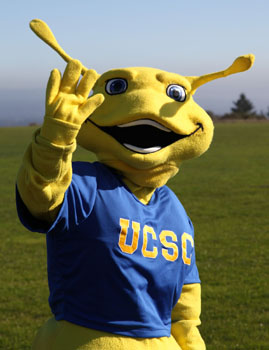

In [4]:
url = "https://news.ucsc.edu/2011/06/images/slugcloseup350.jpg"

image = io.imread(url)
print("Image shape:", image.shape)

Image.fromarray(image)

## Q1: Image Filters (35pts)

### Q1.1 Sharpening Filter (5pts)

You will implement a **sharpening filter** with Numpy.

OpenCV provides a function [cv2.filter2D()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04) to convolve a user-customized kernel with an image.
The call to `cv2.filter2D()` is allowed in this assignment. Therefore, your only need to implement a sharpening filter kernel, and use `cv2.filter2D()` to apply it on the image.

In [182]:
def sharpen_filter(image, kernel_size):
    # `image`: input image
    # `kernel_size`: kernel size. It should be odd and positive.
    # return: output image

    assert isinstance(kernel_size, int) and kernel_size % 2

    # create a 2d box filter kernel of size `kernel_size * kernel_size` using numpy
    ################## Your codes begins here #######################
    sharpen_kernel = -1 * np.ones((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    sharpen_kernel[center, center] = (kernel_size * kernel_size)
    ################# Your codes ends here ###########################

    image = cv2.filter2D(image, -1, sharpen_kernel) # This applies your customized filter to the image.
    return image


In [183]:
image_sharpen = sharpen_filter(image, 5)

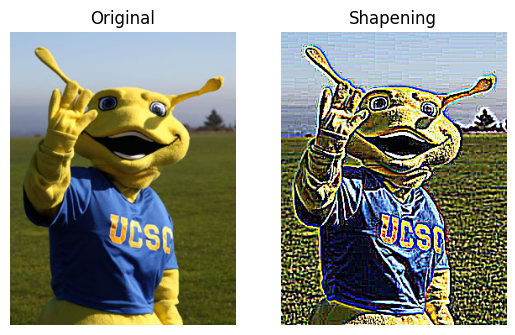

In [184]:
# Visualization
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(image_sharpen)
axs[1].set_title("Shapening")
axs[1].axis("off")
plt.show()

### Q1.2 Box Filter (5pts)
You will implement a **box filter** with Numpy.

The box filter is a linear filter that averages the covered pixels.

Similarly, you only need to implement a filter kernel, and use `cv2.filter2D()` to apply it on the image.

In [185]:
def box_filter(image, kernel_size):
    # `image`: input image
    # `kernel_size`: kernel size. It should be odd and positive.
    # return: output image

    assert isinstance(kernel_size, int) and kernel_size % 2

    # create a 2d box filter kernel of size `kernel_size * kernel_size` using numpy
    ################## Your codes begins here #######################
    box_kernel = np.full((kernel_size, kernel_size), 1 / (kernel_size * kernel_size), dtype=np.float32)
    ################# Your codes ends here ###########################

    image = cv2.filter2D(image, -1, box_kernel) # This applies your customized filter to the image.
    return image


In [186]:
image_box = box_filter(image, 5)
image_sharpen_box = box_filter(image_sharpen, 5)

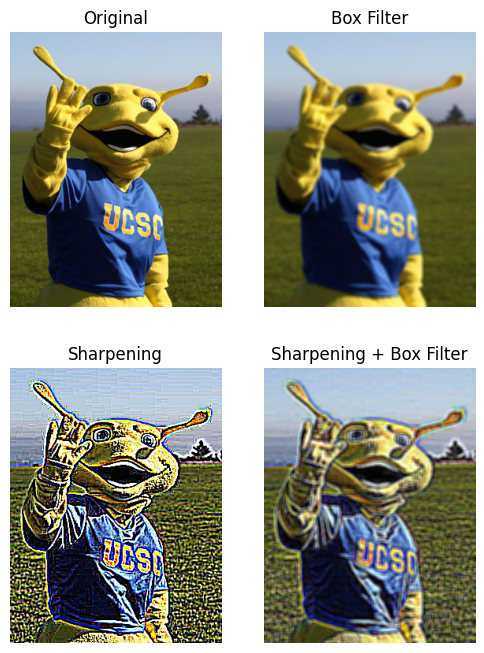

In [187]:
# visualization
fig, axs = plt.subplots(2, 2, figsize=(3 * 2, 4 * 2))
axs[0][0].imshow(image)
axs[0][0].set_title("Original")
axs[0][0].axis("off")

axs[0][1].imshow(image_box)
axs[0][1].set_title("Box Filter")
axs[0][1].axis("off")

axs[1][0].imshow(image_sharpen)
axs[1][0].set_title("Sharpening")
axs[1][0].axis("off")

axs[1][1].imshow(image_sharpen_box)
axs[1][1].set_title("Sharpening + Box Filter")
axs[1][1].axis("off")

plt.show()

### Q1.3 Gaussian Filter (10pts)
You will implement a **2D gaussian filter** with Numpy from scratch.D
Don't use the gaussian function from OpenCV.

Similarly, you only need to implement a filter kernel, and use `cv2.filter2D()` to apply it on the image.

In [188]:
def gauss_filter(img, kernel_size, std):
    # `image`: input image
    # kernel_size: kernel size. It should be odd and positive.
    # std: standard deviation in gaussian distribution
    # return: output image

    assert isinstance(kernel_size, int) and kernel_size % 2

    # create a 2d gaussian kernel of size `kernel_size * kernel_size` using numpy
    # ========== YOUR CODE STARTS HERE ==========
    k = kernel_size // 2
    x = np.arange(-k, k+1)
    y = np.arange(-k, k+1)
    x, y = np.meshgrid(x, y)

    gaussian_kernel = (1 / (2 * np.pi * std ** 2)) * np.exp(-(x**2 + y**2) / (2 * std ** 2))

    gaussian_kernel /= np.sum(gaussian_kernel)

    # ========== YOUR CODE ENDS HERE ==========

    img = cv2.filter2D(img, -1, gaussian_kernel)
    return img


In [189]:
image_gaussian = gauss_filter(image, kernel_size=5, std=1)
image_sharpen_gaussian = gauss_filter(image_sharpen, kernel_size=5, std=1)

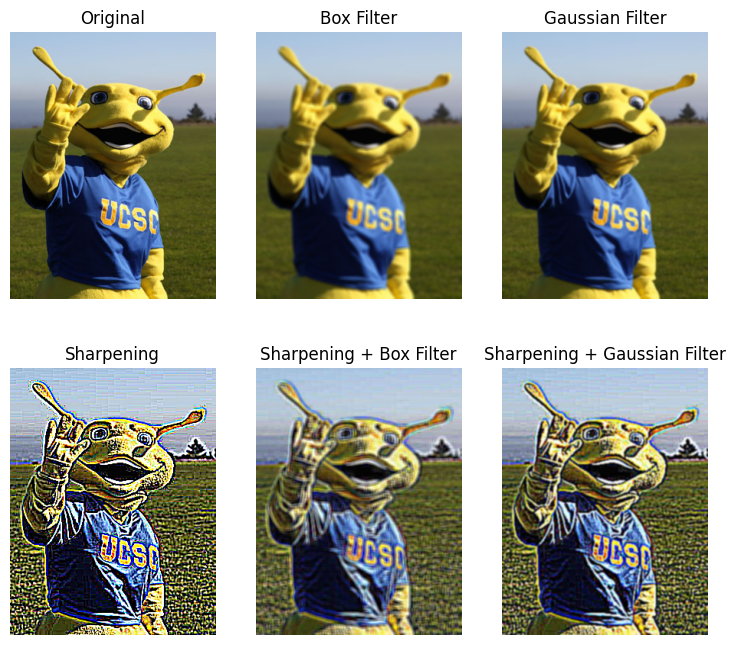

In [190]:
# visualization
fig, axs = plt.subplots(2, 3, figsize=(3 * 3, 4 * 2))
axs[0][0].imshow(image)
axs[0][0].set_title("Original")
axs[0][0].axis("off")

axs[0][1].imshow(image_box)
axs[0][1].set_title("Box Filter")
axs[0][1].axis("off")

axs[0][2].imshow(image_gaussian)
axs[0][2].set_title("Gaussian Filter")
axs[0][2].axis("off")

axs[1][0].imshow(image_sharpen)
axs[1][0].set_title("Sharpening")
axs[1][0].axis("off")

axs[1][1].imshow(image_sharpen_box)
axs[1][1].set_title("Sharpening + Box Filter")
axs[1][1].axis("off")

axs[1][2].imshow(image_sharpen_gaussian)
axs[1][2].set_title("Sharpening + Gaussian Filter")
axs[1][2].axis("off")

plt.show()

### Q1.4 Denoising Salt-and-pepper with Filtering (15pts)
You will first apply salt-and-pepper noise on the image then remove it with different filters.

#### Q1.4.1 Salt-and-pepper Noise (5pts)
Add salt-and-pepper noise onto the clean image by randomly setting some pixels to be dark/white.

In [191]:
def add_sp_noise(image, percent=0.005):
    # `image`: the input image
    # `percent`: ratio of noisy pixels
    # return: noisy image

    output = np.copy(image)

    num_pixels = image.shape[0] * image.shape[1]
    num_salt_and_pepper = int(num_pixels * percent)

    # select two set of `num_salt_or_pepper // 2` pixels from `output` as the salt or pepper pixels,
    # then set salt pixels as [255, 255, 255] and pepper pixels as [0, 0, 0]
    # Your code shouldn't change the values of the original `image` array.
    # Salt and pepper pixels should be sampled with no repetition.
    # ========== YOUR CODE STARTS HERE ==========
    num_salt = num_salt_and_pepper // 2
    num_pepper = num_salt_and_pepper - num_salt

    coords = np.random.choice(num_pixels, size=num_salt_and_pepper, replace=False)
    coords = np.unravel_index(coords, (image.shape[0], image.shape[1]))
    
    output[coords[0][:num_salt], coords[1][:num_salt]] = [255, 255, 255]
    output[coords[0][num_salt:], coords[1][num_salt:]] = [0, 0, 0]
    # ========== YOUR CODE ENDS HERE ==========

    return output

In [192]:
sp_image = add_sp_noise(image, 0.1)

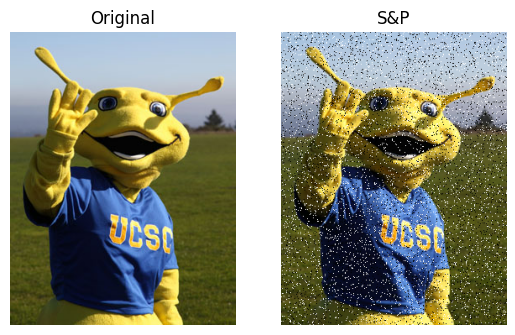

In [193]:
# Visualization
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image)
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(sp_image)
axs[1].set_title('S&P')
axs[1].axis('off')
plt.show()

#### Q1.4.2 Median Filter (10pts)
You will implement median filter from scratch with Numpy.

The median filtering takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise (random occurrences of black and white pixels) in an image.

This implementation consists of two parts. One is the kernel function that takes in a window of pixels and output the median of pixels. Median values are calculated per channel if the input is not grayscale. The other part is the convolution function. Similar to `cv2.filter2D`, this function applies the kernel function on the whole image.

Each part is of 5pts.

In [156]:
# 5pts
def median_kernel(window_image):
    # `window_image`: the input image inside the window. Shape: (kernel_size, kernel_size, num_channels)
    # return: the median pixel

    # ========== YOUR CODE STARTS HERE ==========
    kernel_flat = window_image.reshape(-1, window_image.shape[-1])
    median_pixel = np.median(kernel_flat, axis=0)
    return median_pixel
    # ========== YOUR CODE ENDS HERE ==========


In [157]:
# 5pts
def median_filter(image, kernel_size):
    # `image`: input image
    # kernel_size: kernel size. It should be odd and positive.
    # return: output image

    assert isinstance(kernel_size, int) and kernel_size % 2

    pad_size = kernel_size // 2
    padded_image = np.pad(
        image,
        ((pad_size, pad_size), (pad_size, pad_size), (0, 0)),
        mode='constant', constant_values=0
    )
    output = np.zeros_like(image)

    # ========== YOUR CODE STARTS HERE ==========
    height, width, channels = image.shape

    for i in range(height):
        for j in range(width):
            window = padded_image[i:i+kernel_size, j:j+kernel_size, :]
            median_pixel = median_kernel(window)
            output[i, j] = median_pixel
    # ========== YOUR CODE ENDS HERE ==========
    
    return output

In [158]:
image_median = median_filter(image, kernel_size=5)
sp_median = median_filter(sp_image, kernel_size=5)

sp_gaussian = gauss_filter(sp_image, kernel_size=5, std=1)
sp_box = box_filter(sp_image, kernel_size=5)

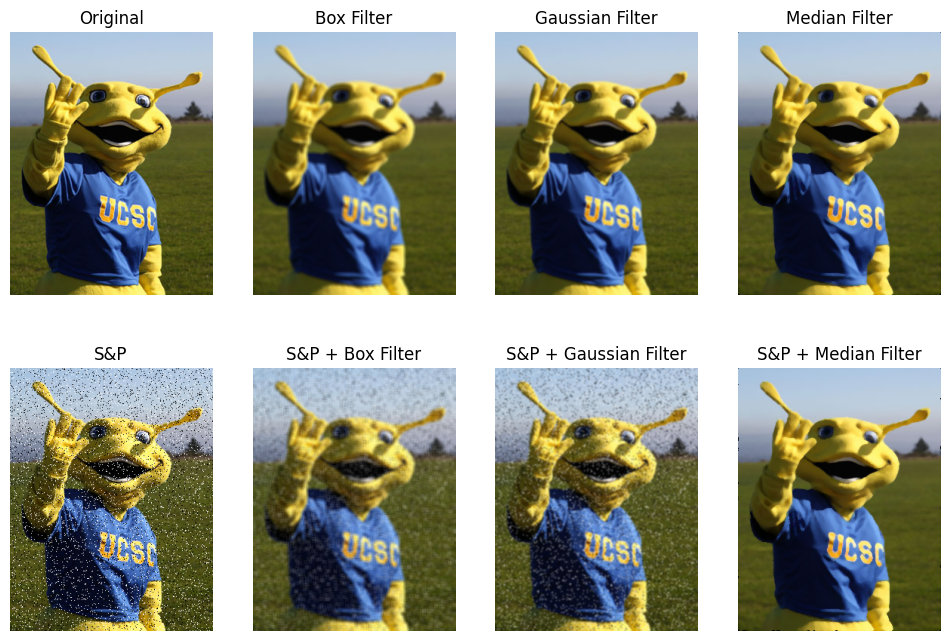

In [159]:
# visualization
fig, axs = plt.subplots(2, 4, figsize=(3 * 4, 4 * 2))
axs[0][0].imshow(image)
axs[0][0].set_title("Original")
axs[0][0].axis("off")

axs[0][1].imshow(image_box)
axs[0][1].set_title("Box Filter")
axs[0][1].axis("off")

axs[0][2].imshow(image_gaussian)
axs[0][2].set_title("Gaussian Filter")
axs[0][2].axis("off")

axs[0][3].imshow(image_median)
axs[0][3].set_title("Median Filter")
axs[0][3].axis("off")

axs[1][0].imshow(sp_image)
axs[1][0].set_title("S&P")
axs[1][0].axis("off")

axs[1][1].imshow(sp_box)
axs[1][1].set_title("S&P + Box Filter")
axs[1][1].axis("off")

axs[1][2].imshow(sp_gaussian)
axs[1][2].set_title("S&P + Gaussian Filter")
axs[1][2].axis("off")

axs[1][3].imshow(sp_median)
axs[1][3].set_title("S&P + Median Filter")
axs[1][3].axis("off")

plt.show()

## Q2: Canny Edge Detection (25pts)

You will implement multiple stages of Canny Edge Detection in this question.

**Convert into gray-scale image**

For simplicity, we will perform edge detection on gray-scale images only.

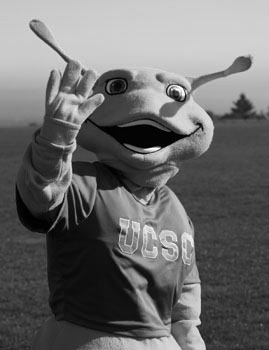

In [160]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
Image.fromarray(gray_image)

**Noise Reduction**

Edge detection is susceptible to noise in the image. Therefore, the image is denoised with a 5x5 Gaussian filter.

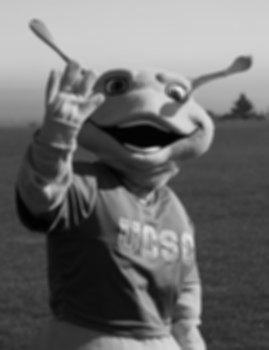

In [161]:
input_image = gauss_filter(gray_image, kernel_size=5, std=2)
Image.fromarray(input_image)

### Q2.1 Sobel Filtering (5pts)

You will compute image gradient magnitude and orientation using Sobel Filtering.

The gradient magnitude is calculated as the square root of the sum of the squares of the x and y gradients.

And the gradient orientation is calculated as the arctangent of the ratio of the y gradient to the x gradient, converted to degrees.

In [162]:
def sobel_filter3x3(image):
    # image: input image
    # return: grad_mag: gradient magnitudes, grad_dir: gradient directions in degree.
    sobel_kernel_x = np.array(
        [
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]
        ], np.float32
    )
    sobel_kernel_y = np.array(
        [
            [-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1]
        ], np.float32
    )

    grad_x = cv2.filter2D(image.astype(np.float32), -1, sobel_kernel_x)
    grad_y = cv2.filter2D(image.astype(np.float32), -1, sobel_kernel_y)

    # ========== YOUR CODE STARTS HERE ==========
    grad_mag = np.sqrt(grad_x ** 2 + grad_y ** 2)
    grad_dir = np.degrees(np.arctan2(grad_y, grad_x))
    # ========== YOUR CODE ENDS HERE ============

    return grad_mag, grad_dir

In [163]:
grad_mag, grad_dir = sobel_filter3x3(input_image)

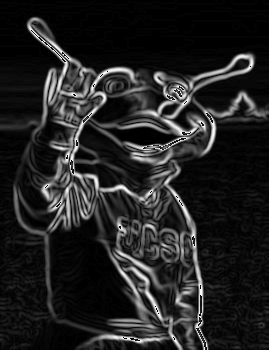

In [164]:
Image.fromarray(grad_mag.astype("uint8"))

### Q2.2 Non-maximum Suppression (10pts)

NMS is applied to thin out the rough edges acquired by Sobel Filtering.

Each pixel is checked whether it is the local maximum in the direction of gradient. If not, the magnitude is removed. The gradient directions are quantized to one of four possible angles (e.g. 0, 45, 90 or 135).

In [165]:
def nms(magnitude, direction):
    # magnitude: gradient magnitude
    # direction: gradient direction
    # return: magnitude array after nms

    # Ensure the angle is within the 0-180 degree range
    angle = np.copy(direction)
    angle[angle < 0] += 180
    assert ((angle >= 0) & (angle <= 180)).all()

    # Create a copy of the magnitude to apply NMS
    output = np.copy(magnitude)

    # Check every pixel except the border pixels
    for i in range(1, magnitude.shape[0] - 1):
        for j in range(1, magnitude.shape[1] - 1):

            # Define neighbors in the direction of the gradient
            # 0 degree
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                neighbor1 = magnitude[i, j+1]
                neighbor2 = magnitude[i, j-1]
            # 45 degree
            elif (22.5 <= angle[i,j] < 67.5):
                neighbor1 = magnitude[i+1, j-1]
                neighbor2 = magnitude[i-1, j+1]
            # 90 degree and 180 degree
            # ========== YOUR CODE STARTS HERE ==========
            elif (67.5 <= angle[i,j] < 112.5):
                neighbor1 = magnitude[i+1, j]
                neighbor2 = magnitude[i-1, j]
            elif (112.5 <= angle[i,j] < 157.5):
                neighbor1 = magnitude[i, j+1]
                neighbor2 = magnitude[i, j-1]
            # ========== YOUR CODE ENDS HERE ============

            # Suppress pixels at the current position (i,j) if at least one of the neighbors is greater
            # ========== YOUR CODE STARTS HERE ==========
            if (magnitude[i, j] < neighbor1) or (magnitude[i, j] < neighbor2):
                output[i, j] = 0
            # ========== YOUR CODE ENDS HERE ============

    return output


In [166]:
grad_nms = nms(grad_mag, grad_dir)

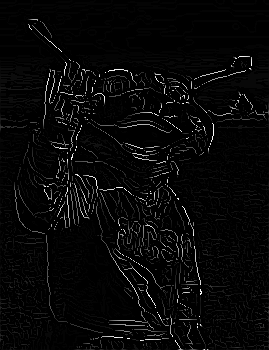

In [167]:
Image.fromarray(grad_nms.astype("uint8"))

### Q2.3 Hysteresis Thresholding (10pts)

The Hysteresis Thresholding is comprised with two steps.

1. Double Thresholding (`min_thres`, `max_thres`)  
   Any edges with magnitude greater than `max_thres` are considered positive and those below `max_thres` are considered negative. Middle ones are ambiguous and will be decided in the second step.
2. Floodfill  (10pts)  
   Any ambiguous pixel adjacent to positive ones are also considered positive. The Floodfill algoithm is used to determine whether a ambiguous pixel should be positive or negative.

The code for Double Thresholding is given and you will implement Floodfill based on BFS (binary-first-traverse).

#### Double Thresholding


In [168]:
def double_threshold(magnitude):
    mask = np.full_like(magnitude, -1).astype("float32")
    min_thres, max_thres = 0.1 * np.max(image), 0.8 * np.max(image)
    mask[magnitude > max_thres] = 1
    mask[magnitude < min_thres] = 0

    return mask

In [169]:
mask = double_threshold(grad_nms)

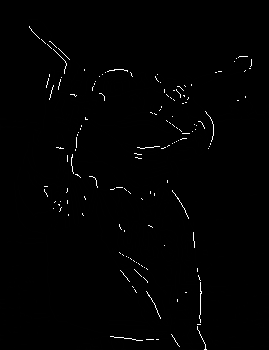

In [170]:
Image.fromarray(mask.astype("uint8") * 255)

#### Floodfill with BFS (10pts)

In [171]:
def floodfill(mask):
    output = np.copy(mask)

    # 8-connectivity: bottom, right, top, left, upper right, upper left, lower right, lower left
    dirs = [(1, 0), (0, 1), (-1, 0), (0, -1), (-1, 1), (-1, -1), (1, 1), (1, -1)]

    # ========== YOUR CODE STARTS HERE ==========
    queue = deque()
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            if output[i, j] == 1.0:
                queue.append((i, j))

    while queue:
        x, y = queue.popleft()

        for dx, dy in dirs:
            nx, ny = x + dx, y + dy
            if 0 <= nx < output.shape[0] and 0 <= ny < output.shape[1]:
                if output[nx, ny] == 0.5:
                    output[nx, ny] = 1.0
                    queue.append((nx, ny))
    # ========== YOUR CODE ENDS HERE ==========

    return output

In [172]:
final_edges = floodfill(mask)

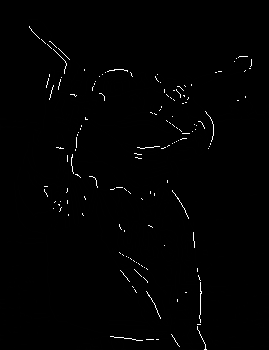

In [173]:
Image.fromarray(final_edges.astype("uint8") * 255)

## Q3: Boundary Detection (40pts)

In this section, you will implement basic boundary detection techniques, focusing on line detection using the **Hough Transform**. You will also visualize the detected lines over the original image.

### Q3.1 Edge Map Preparation (5pts)

Use Canny Edge Detector (you may use OpenCV's built-in method `cv2.Canny`) to generate an edge map from the input image.

Hint: You may need to convert the image to grayscale before applying Canny.

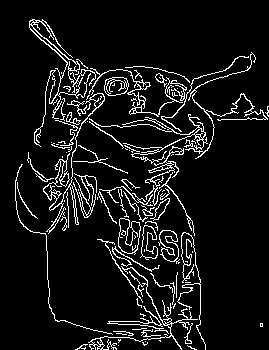

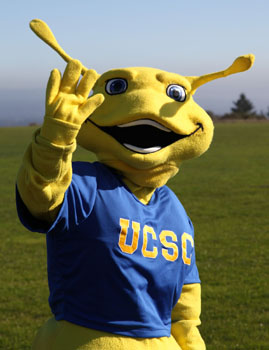

In [174]:
# ========== YOUR CODE STARTS HERE ==========
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
def prepare_edge_map(image, low_thresh=50, high_thresh=200):
    edges = cv2.Canny(gray, low_thresh, high_thresh)
    return edges
edges = prepare_edge_map(gray)
display(Image.fromarray(edges))
display(Image.fromarray(image))
# ========== YOUR CODE ENDS HERE ==========

### Q3.2 Hough Transform Line Detection (20pts)

Use `cv2.HoughLinesP` to detect straight lines in the edge map. Plot the detected lines over the original image.

Hint: Use parameters like `rho=1`, `theta=np.pi/180`, `threshold=80`, and experiment with `minLineLength` and `maxLineGap`.

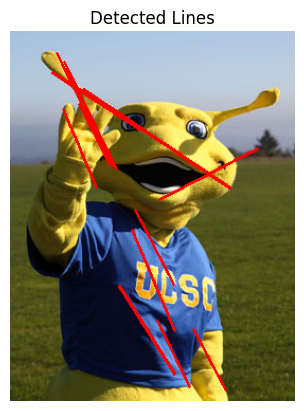

array([[[166, 193, 220],
        [166, 193, 220],
        [166, 193, 220],
        ...,
        [177, 198, 225],
        [177, 198, 225],
        [177, 198, 225]],

       [[166, 193, 220],
        [166, 193, 220],
        [166, 193, 220],
        ...,
        [177, 198, 225],
        [177, 198, 225],
        [177, 198, 225]],

       [[166, 193, 220],
        [166, 193, 220],
        [166, 193, 220],
        ...,
        [177, 198, 225],
        [177, 198, 225],
        [177, 198, 225]],

       ...,

       [[ 40,  45,   4],
        [ 45,  50,   9],
        [ 47,  52,  11],
        ...,
        [ 63,  72,  17],
        [ 66,  75,  20],
        [ 65,  74,  19]],

       [[ 56,  61,  20],
        [ 58,  63,  22],
        [ 57,  62,  21],
        ...,
        [ 56,  65,  10],
        [ 59,  68,  13],
        [ 58,  67,  12]],

       [[ 56,  62,  18],
        [ 58,  64,  20],
        [ 59,  65,  21],
        ...,
        [ 56,  64,   4],
        [ 57,  65,   5],
        [ 55,  63,   3]]

In [175]:
# ========== YOUR CODE STARTS HERE ==========
def detect_and_draw_lines(image, edges):
    line_image = np.copy(image)
    lines = cv2.HoughLinesP(
        edges,
        rho=1,
        theta=np.pi / 180,
        threshold=80,
        minLineLength=50,
        maxLineGap=10
    )

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(line_image)
    plt.axis('off')
    plt.title("Detected Lines")
    plt.show()

    return line_image

detect_and_draw_lines(image, edges)
# ========== YOUR CODE ENDS HERE ==========

### Q3.3 Curve Fitting (15pts)

Now implement a simple **polynomial curve fitting** (e.g., 2nd degree) using NumPy's `polyfit` on selected edge points. This simulates the idea of fitting a curve to a boundary.

/tmp/ipykernel_3705/4276938167.py:8: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_coords, y_coords, deg=degree)


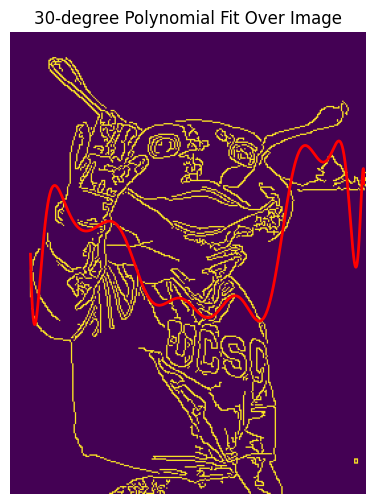

In [181]:
# ========== YOUR CODE STARTS HERE ==========
def fit_and_plot_polynomial(image, edges, low_thresh=50, high_thresh=150, degree=30):

    # coordinates of points, which make up the edges
    y_coords, x_coords = np.nonzero(edges)

    # fit these points to a polynomial
    coeffs = np.polyfit(x_coords, y_coords, deg=degree)
    poly = np.poly1d(coeffs)

    x_fit = np.linspace(min(x_coords), max(x_coords), 1000)
    y_fit = poly(x_fit)

    # lets see it
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.plot(x_fit, y_fit, color='red', linewidth=2)
    plt.title(f"{degree}-degree Polynomial Fit Over Image")
    plt.axis('off')
    plt.show()
fit_and_plot_polynomial(edges, edges)
# ========== YOUR CODE ENDS HERE ==========
